In [287]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
from mpl_toolkits.mplot3d import Axes3D
from numpy import (linspace,logspace,zeros,ones,outer,meshgrid,
                   pi,sin,cos,sqrt,exp)
from numpy.random import normal
%matplotlib inline

plt.style.use('fivethirtyeight')
pi = np.pi
g = 10

In [19]:
def average_value(arr):
    return sum(arr) / len(arr)
def average_fault(arr):
    len_arr = len(arr)
    average_value = sum(arr)/len_arr
    res = 0
    for i in range(len(arr)):
        res+=(arr[i] - average_value)**2
    res = (res/(len_arr * (len_arr - 1)))**0.5
    return res

# Empty frame

## *data*

In [187]:
m_frame = 2083.3 * 10 ** (-3)

time_data_empty_frame = [44.22, 43.97, 44.56]
time_data_empty_frame = [x / 10 for x in time_data_empty_frame]

period_empty_frame = average_value(time_data_empty_frame)
period_empty_frame_fault = average_fault(time_data_empty_frame)



In [188]:
print("period = ", period_empty_frame)
print("period fault = ", period_empty_frame_fault)
print(time_data_empty_frame)

period =  4.425
period fault =  0.017097758137642947
[4.422, 4.397, 4.456]


# Cylinder

## *data*

In [11]:
m_clnd = 2263.7 * 10 ** (-3)
d_clnd = 85 * 10 ** (-3)
h_clnd = 49 * 10 ** (-3)

dm = 0.5 * 10 ** (-3)
dr = 0.01 * 10 ** (-3)
n = 3

In [332]:
time_data_clnd_oz = [29.19 + 28.03 + 27.34, 27.06 + 28.25 + 27.44, 27.41 + 28.00 + 28.34]
time_data_clnd_oz = [(x / 15) for x in time_data_clnd_oz]

time_data_clnd_ox = [26.09 + 26.40 + 26.50, 26.60 + 26.70 + 26.35, 26.72 + 26.06 + 26.09]
time_data_clnd_ox = [(x / 15) for x in time_data_clnd_ox]

tcx = average_value(time_data_clnd_ox)
tcz = average_value(time_data_clnd_oz)

tcx_fault = average_fault(time_data_clnd_ox)
tcz_fault = average_fault(time_data_clnd_oz)

In [333]:
print("x", tcx, tcx_fault)
print("z", tcz, tcz_fault)

x 5.278 0.01616580753730968
z 5.579111111111111 0.034897380424522235


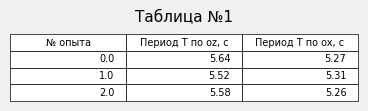

In [330]:
column1 = {'№ опыта': [x for x in range(n)] }            
column2 = {'Период T по oz, с': [round(x, 2) for x in time_data_clnd_oz]}
column3 = {'Период T по ox, с': [round(x, 2) for x in time_data_clnd_ox]}

column1.update(column2)
column1.update(column3)

table1 = pd.DataFrame(column1)

fig = plt.figure(figsize = (4, 0.05))
ax = fig.add_subplot(111)

ax.table(cellText = table1.values, colLabels = table1.columns)

ax.set_title("Таблица №1", size = 11)

ax.axis("off");

## *theoretical moment of inertia of clnd*

In [334]:
theoretical_I_clnd_x = m_clnd * ((d_clnd / 2)**2) * 0.5
theoretical_I_clnd_fault_x = ((dm / m_clnd)**2 + (dr / d_clnd)**2)**0.5

theoretical_I_clnd_z = m_clnd*(0.25 * (d_clnd / 2)**2 + (1 / 12)*(h_clnd)**2)

In [335]:
print(theoretical_I_clnd_x / theoretical_I_clnd_z)

1.3859138719268518


In [339]:
pcx = 1 / (tcx**2 - tff**2)**0.5

pcx

0.347594158045229

In [340]:
pcz = 1 / (tcz**2 - tff**2)**0.5

pcz

0.2942977458109887

In [347]:
print((pcz / pcx)**2)

0.7168510633122587


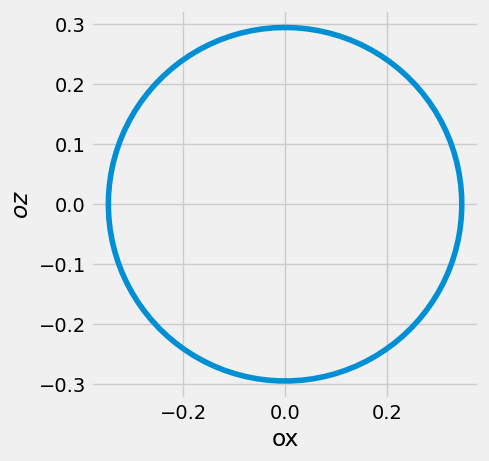

In [346]:
fig, ax = plt.subplots()
xc= [pcx*math.sin(t[i]) for i in range(n_t)]
yc = [pcz*math.cos(t[i]) for i in range(n_t)]
#create simple line plot
plt.plot(xc, yc)
# plt.scatter(pcx, pcz, color = 'g')
plt.xlabel(r'ox')
plt.ylabel(r'$oz$')
#set aspect ratio to 1
ratio = 1.0
x_left, x_right = ax.get_xlim ()
y_low, y_high = ax.get_ylim ()
ax.set_aspect ( abs ((x_right-x_left)/(y_low-y_high))*ratio)

#display plot
plt.show() 

# Cube

## *data*

In [273]:
m_cube = 1094.4 * 10 ** (-3)
length_data_cube = [9.24, 9.27, 9.26]

a_cube = average_value(length_data_cube) * 10 ** (-3)
a_cube_fault = average_fault(length_data_cube)* 10 ** (-3)

time_data_cube_ox1 = [26.13 + 26.91, 26.34 + 26.38, 26.44 + 26.21]
time_data_cube_ox1 = [x / 10 for x in time_data_cube_ox1]

time_data_cube_ox2 = [25.96 + 26.47, 26.53 + 26.37, 26.78 + 26.56]
time_data_cube_ox2 = [x / 10 for x in time_data_cube_ox2]

time_data_cube_ox3 = [52.47, 52.53, 52.52]
time_data_cube_ox3 = [x / 10 for x in time_data_cube_ox3]


In [274]:
print(a_cube, a_cube_fault)

0.009256666666666667 8.819171036881782e-06


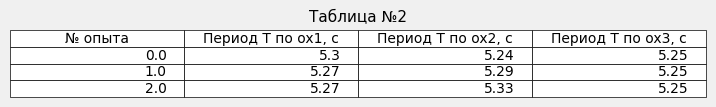

In [23]:
column1 = {'№ опыта': [x for x in range(n)] }            
column2 = {'Период T по ox1, с': [round(x, 2) for x in time_data_cube_ox1]}
column3 = {'Период T по ox2, с': [round(x, 2) for x in time_data_cube_ox2]}
column4 = {'Период T по ox3, с': [round(x, 2) for x in time_data_cube_ox3]}

column1.update(column2)
column1.update(column3)
column1.update(column4)

table2 = pd.DataFrame(column1)

fig = plt.figure(figsize = (8, 0.005))
ax = fig.add_subplot(111)

ax.table(cellText = table2.values, colLabels = table2.columns)

ax.set_title("Таблица №2", size = 11)

ax.axis("off");

In [276]:
tx1 = average_value(time_data_cube_ox1);
tx1_fault = average_fault(time_data_cube_ox1)

print("tx1 = ", tx1)
print("tx1 fault", tx1_fault)

tx1 =  5.280333333333334
tx1 fault 0.012004628736912678


In [277]:
tx2 = average_value(time_data_cube_ox2);
tx2_fault = average_fault(time_data_cube_ox2)

print("tx2 = ", tx2)
print("tx2 fault", tx2_fault)

tx2 =  5.289000000000001
tx2 fault 0.026274195198584798


In [278]:
tx3 = average_value(time_data_cube_ox3);
tx3_fault = average_fault(time_data_cube_ox3)

print("tx3 = ", tx3)
print("tx3 fault", tx3_fault)

tx3 =  5.250666666666667
tx3 fault 0.0018559214542768153


In [293]:
p1 = 1 / (tx1**2 - tff**2)**0.5

p1

0.3470779897185413

In [294]:
p2 = 1 / (tx2**2 - tff**2)**0.5

p2

0.3451787718538656

In [295]:
p3 = 1 / (tx3**2 - tff**2)**0.5

p3

0.35379946753430985

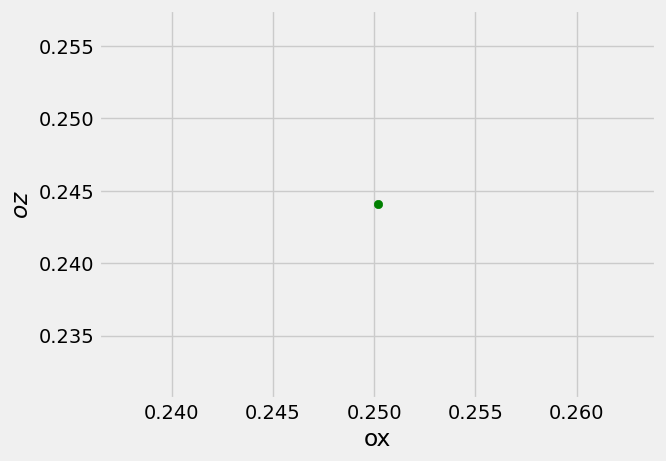

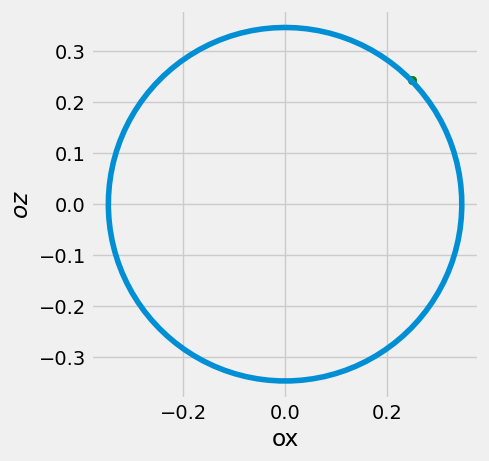

In [318]:
n_t = 100
fig, ax = plt.subplots()
x_c = [p3/((2)**0.5)]
y_c = [p2/((2)**0.5)]
t=np.linspace(0,2*pi,n_t)
x = [p1*math.sin(t[i]) for i in range(n_t)]
y = [p1*math.cos(t[i]) for i in range(n_t)]
x2 = [p3*math.sin(t[i]) for i in range(n_t)]
y2 = [p3*math.cos(t[i]) for i in range(n_t)]
plt.scatter(x_c, y_c, color = 'g')
plt.xlabel(r'ox')
plt.ylabel(r'$oz$')
# plt.plot(x, y)
# plt.plot(x2, y2, color = "r", alpha = 0.3)
# axes().set_aspect(9)
fig, ax = plt.subplots()

#create simple line plot
plt.plot(x, y)
plt.scatter(x_c, y_c, color = 'g')
plt.xlabel(r'ox')
plt.ylabel(r'$oz$')
#set aspect ratio to 1
ratio = 1.0
x_left, x_right = ax.get_xlim ()
y_low, y_high = ax.get_ylim ()
ax.set_aspect ( abs ((x_right-x_left)/(y_low-y_high))*ratio)

#display plot
plt.show() 

# PARALLELEPIPED

## *data*

In [233]:
m_par = 2083.3 * 10 ** (-3)
a = 5.02 * 10 ** (-2)
b = 10.05 * 10 ** (-2)
c = 15 * 10 ** (-2)

d = (a**2 + b**2 + c**2)**0.5

dr = 0.05 * 10 ** (-3)
n_par = 11
tff = period_empty_frame

In [190]:
time_data_zz = [56.03, 56.25, 55.94]
time_data_zz = [x / n_par for x in time_data_zz]

time_data_xx = [70.10, 70.40, 70.31]
time_data_xx = [x / n_par for x in time_data_xx]

time_data_yy = [64.62, 64.82, 64.72]
time_data_yy = [x / n_par for x in time_data_yy]

time_data_ee = [58.50, 58.51, 58.52]
time_data_ee = [x / n_par for x in time_data_ee]

time_data_pp = [57.68, 57.47, 57.85]
time_data_pp = [x / n_par for x in time_data_pp]

time_data_mm = [66.18, 65.85, 65.47]
time_data_mm = [x / n_par for x in time_data_mm]

time_data_dd = [60.2, 60.15, 60.19]
time_data_dd = [x / n_par for x in time_data_dd]


## table

In [191]:
[round(time_data_zz[i], 2) for i in range(3)]

[5.09, 5.11, 5.09]

In [192]:
[round(time_data_xx[i], 2) for i in range(3)]

[6.37, 6.4, 6.39]

In [193]:
[round(time_data_yy[i], 2) for i in range(3)]

[5.87, 5.89, 5.88]

In [194]:
[round(time_data_ee[i], 2) for i in range(3)]

[5.32, 5.32, 5.32]

In [195]:
[round(time_data_pp[i], 2) for i in range(3)]

[5.24, 5.22, 5.26]

In [196]:
[round(time_data_mm[i], 2) for i in range(3)]

[6.02, 5.99, 5.95]

In [197]:
[round(time_data_dd[i], 2) for i in range(3)]

[5.47, 5.47, 5.47]

In [198]:
tzz = average_value(time_data_zz);
tzz_fault = average_fault(time_data_zz)

print("tzz = ", tzz)
print("tzz fault", tzz_fault)

tzz =  5.097575757575758
tzz fault 0.00837044079814129


In [199]:
txx = average_value(time_data_xx);
txx_fault = average_fault(time_data_xx)

print("txx = ", txx)
print("txx fault", txx_fault)

txx =  6.388181818181818
txx fault 0.008080176743014434


In [200]:
tyy = average_value(time_data_yy);
tyy_fault = average_fault(time_data_yy)

print("tyy = ", tyy)
print("tyy fault", tyy_fault)

tyy =  5.883636363636363
tyy fault 0.005248638810814364


In [201]:
tee = average_value(time_data_ee);
tee_fault = average_fault(time_data_ee)

print("tee = ", tee)
print("tee fault", tee_fault)

tee =  5.319090909090909
tee fault 0.0005248638810815134


In [202]:
tpp = average_value(time_data_pp);
tpp_fault = average_fault(time_data_pp)

print("tpp = ", tpp)
print("tpp fault", tpp_fault)

tpp =  5.242424242424242
tpp fault 0.00999081304353598


In [203]:
tmm = average_value(time_data_mm);
tmm_fault = average_fault(time_data_mm)

print("tmm = ", tmm)
print("tmm fault", tmm_fault)

tmm =  5.984848484848484
tmm fault 0.018648062354261096


In [204]:
tdd = average_value(time_data_dd);
tdd_fault = average_fault(time_data_dd)

print("tdd = ", tdd)
print("tdd fault", tdd_fault)

tdd =  5.470909090909092
tdd fault 0.0013886593015018636


## check

In [205]:
ddl = (a**2 + b**2 + c**2) * (tdd**2)
ddr = (a**2) * (txx ** 2) + (b**2)*(tyy**2) + (c**2) * (tzz**2)

print(ddl)
print(ddr)

1.0511800013338515
1.0371508862191403


In [206]:
eel = (b**2 + c**2) * (tee**2)
eer = (b**2)*(tyy**2) + (c**2) * (tzz**2)

print(eel)
print(eer)

0.9223500092150826
0.934310909170248


In [207]:
ppl = (a**2 + c**2) * (tpp**2)
ppr = (a**2) * (txx ** 2) + (c**2) * (tzz**2)

print(ppl)
print(ppr)

0.6876260579981633
0.6875087456439339


In [208]:
mml = (a**2 + b**2) * (tmm**2)
mmr = (a**2) * (txx ** 2) + (b**2)*(tyy**2)

print(mml)
print(mmr)

0.4520387390381083
0.45248211762409907


## frame and parallelepiped

In [239]:
pz = 1 / (tzz**2 - tff**2)**0.5

pz

0.39514107501853746

In [240]:
px = 1 / (txx**2 - tff**2)**0.5

px

0.2170416016579906

In [241]:
py = 1 / (tyy**2 - tff**2)**0.5

py

0.2578848752034675

In [242]:
pe = 1 / (tee**2 - tff**2)**0.5

pe

0.3387961737314778

In [243]:
pp = 1 / (tpp**2 - tff**2)**0.5

pp

0.3557302966547515

In [244]:
pm = 1 / (tmm**2 - tff**2)**0.5

pm

0.24816274713512473

In [245]:
pd = 1 / (tdd**2 - tff**2)**0.5

pd

0.3108316133380738

## experimental otnoshenie

In [268]:
ixx_iyy = (py / px)**2
ixx_iyy

1.4117759271206232

In [269]:
ixx_izz = (pz / px)**2
ixx_izz

3.314502743465796

In [271]:
iyy_izz = (pz / py)**2
iyy_izz

2.3477541157865365

## theoretical moment of inertia

In [246]:
IZZ = m_par * (1 / 12) * (a**2 + b**2)
print("IZZ = ", IZZ)

IZZ =  0.0021909875130833338


In [247]:
IXX = m_par * (1 / 12) * (c**2 + b**2)
print("IXX = ", IXX)

IXX =  0.005659675068750001


In [248]:
IYY = m_par * (1 / 12) * (a**2 + c**2)
print("IYY = ", IYY)

IYY =  0.004343687444333334


In [249]:
xx_yy = IXX / IYY
xx_zz = IXX / IZZ
yy_zz = IYY / IZZ

print(xx_yy)
print(xx_zz)
print(yy_zz)

1.3029655428208748
2.5831617181538618
1.9825249657495982


## graph

In [324]:
p_z = [pz, 0, (c/(c**2 + a**2)**0.5) * pp]
p_x = [0, px, (a/(c**2 + a**2)**0.5) * pp]

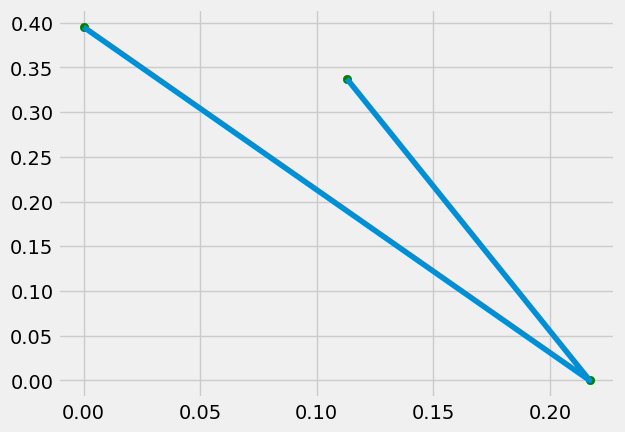

In [325]:
plt.plot(p_x, p_z)
plt.scatter(p_x, p_z, color = 'g')

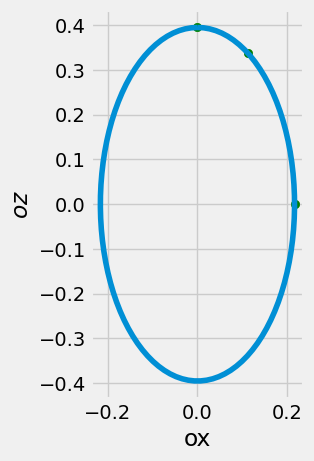

In [329]:
n_t = 100
fig, ax = plt.subplots()
t=np.linspace(0,2*pi,n_t)
x = [px*math.sin(t[i]) for i in range(n_t)]
y = [pz*math.cos(t[i]) for i in range(n_t)]

#set aspect ratio to 1
ratio = 1.0
x_left, x_right = ax.get_xlim ()
y_low, y_high = ax.get_ylim ()
ax.set_aspect ( abs ((x_right-x_left)/(y_low-y_high))*ratio)
plt.plot(x, y)
plt.scatter(p_x, p_z, color = 'g')
plt.xlabel(r'ox')
plt.ylabel(r'$oz$')

#display plot
plt.show() 

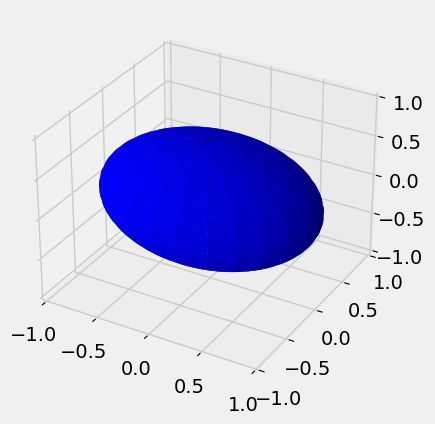

In [327]:
fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

coefs = (1, 2, 2)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

# Plot:
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b')

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()